In [1]:
from diffusers import DiffusionPipeline
from transformers import AutoTokenizer,AutoModel
from diffusers.models import AutoencoderKL

In [2]:

vae = AutoencoderKL.from_pretrained("stabilityai/sd-vae-ft-ema")

pipeline = DiffusionPipeline.from_pretrained(
                    "CompVis/stable-diffusion-v1-4",
                    tokenizer=AutoTokenizer.from_pretrained('csebuetnlp/banglabert'),
                    text_encoder = AutoModel.from_pretrained("csebuetnlp/banglabert"),
                    vae=vae
                )

Some weights of the model checkpoint at csebuetnlp/banglabert were not used when initializing ElectraModel: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense_prediction.weight']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at csebuetnlp/banglabert were not used when initializing ElectraModel: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias', 'dis

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/200 [00:00<?, ?it/s]

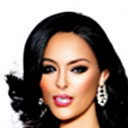

In [4]:
model_path = "../saved models/checkpoint-526500 celeba bangla bert/"
# model_path = "D:/ddpm/sd-celeba/checkpoint-168000/"
pipeline.unet.load_attn_procs(model_path)
pipeline.to("cuda")

prompt = "মেয়েটির কালো চুল ছিল। মেয়েটির মুখে ভারী মেকাপ ছিল। মেয়েটির উঁচু গালের হাড় ছিল। মেয়েটির মুখ কিছুটা খোলা ছিল। মেয়েটির চেহারা ডিম্বাকৃতির। মেয়েটির চোখা নাক ছিল। মেয়েটির ঢেউ খেলানো চুল ছিল। মেয়েটির কানে দুল পরা ছিল। মেয়েটির লিপস্টিক পরা ছিল। "
image = pipeline(prompt, num_inference_steps=200, guidance_scale=7.5,height=128,width=128).images[0]
image

In [5]:
prompts = [
    'মেয়েটির কালো চুল ছিল। মেয়েটির মুখে ভারী মেকাপ ছিল। মেয়েটির উঁচু গালের হাড় ছিল। মেয়েটির মুখ কিছুটা খোলা ছিল। মেয়েটির চেহারা ডিম্বাকৃতির। মেয়েটির চোখা নাক ছিল। মেয়েটির ঢেউ খেলানো চুল ছিল। মেয়েটির কানে দুল পরা ছিল। মেয়েটির লিপস্টিক পরা ছিল। ',
   'ছেলেটির মুখে ছিল হালকা দাড়ি। ছেলেটির উঁচু গালের হাড় ছিল। ছেলেটির মুখে ছিল হাসি। ছেলেটির ঢেউ খেলানো চুল ছিল।  ছেলেটির মুখ কিছুটা খোলা ছিল।  ',
   'মেয়েটির কালো চুল ছিল। মেয়েটির মুখে ভারী মেকাপ ছিল। মেয়েটির উঁচু গালের হাড় ছিল। মেয়েটির মুখ কিছুটা খোলা ছিল। মেয়েটির চেহারা ডিম্বাকৃতির। মেয়েটির সামনের চুল কম ছিল। মেয়েটির মুখে ছিল হাসি। মেয়েটির ঢেউ খেলানো চুল ছিল। মেয়েটির লিপস্টিক পরা ছিল। মেয়েটির নেকলেস পরা ছিল। ',
    'ছেলেটির মুখে ছিল হালকা দাড়ি। ছেলেটির চোখের নিচে কালি ছিল। ছেলেটির উঁচু গালের হাড় ছিল। ছেলেটির মুখ কিছুটা খোলা ছিল। ছেলেটির দাড়ি নেই। ছেলেটির মুখে ছিল হাসি। ছেলেটির ঢেউ খেলানো চুল ছিল। ',
   'মেয়েটির কালো চুল ছিল। মেয়েটির মুখে ভারী মেকাপ ছিল। মেয়েটির উঁচু গালের হাড় ছিল। মেয়েটির চেহারা ডিম্বাকৃতির। মেয়েটির চোখা নাক ছিল। মেয়েটির মুখে ছিল হাসি। মেয়েটির লিপস্টিক পরা ছিল। ',
   'ছেলেটির জুলফি ছিল। ছেলেটির কালো চুল ছিল। ছেলেটির দাড়ি নেই। ছেলেটির মুখে ছিল হালকা দাড়ি। ছেলেটির সোজা চুল ছিল। ছেলেটির উঁচু গালের হাড় ছিল। ',
    'মেয়েটির ভ্রু কুচকানো ছিল। মেয়েটির বড় ঠোঁট ছিল। মেয়েটির কালো চুল ছিল। মেয়েটির মুখে ভারী মেকাপ ছিল। মেয়েটির উঁচু গালের হাড় ছিল। মেয়েটির মুখ কিছুটা খোলা ছিল। মেয়েটির চেহারা ডিম্বাকৃতির। মেয়েটির চোখা নাক ছিল। মেয়েটির গোলাপী গাল ছিল। মেয়েটির মুখে ছিল হাসি। মেয়েটির ঢেউ খেলানো চুল ছিল। মেয়েটির কানে দুল পরা ছিল। মেয়েটির লিপস্টিক পরা ছিল। মেয়েটির নেকলেস পরা ছিল। ',
]
images=[]

In [6]:
for p in prompts:
    image = pipeline(p, num_inference_steps=200, guidance_scale=7.5,height=128,width=128).images[0]
    images.append(image)

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

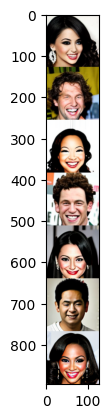

In [7]:
# library 
from PIL import Image 
import matplotlib.pyplot as plt

# creating a new image and pasting the 
# images 
background = Image.new("RGB", (128, 896), "white") 

# pasting the first image (image_name, 
# (position)) 
for i in range(7):
    background.paste(images[i],(0,i*128)) 

plt.imshow(background) 


In [6]:
background.save('output.jpg')